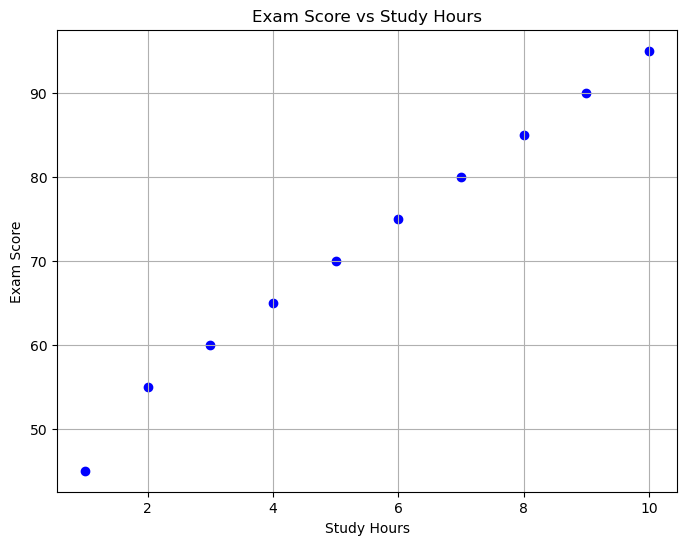

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulated data for study hours and exam scores
study_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Input feature (X)
exam_scores = np.array([45, 55, 60, 65, 70, 75, 80, 85, 90, 95])  # Target variable (y)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(study_hours, exam_scores, color='blue')
plt.title('Exam Score vs Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(study_hours.reshape(-1, 1), exam_scores, test_size=0.8, random_state=42)

# Print shapes for debugging
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (2, 1), y_train shape: (2,)
X_test shape: (8, 1), y_test shape: (8,)


Root Mean Squared Error (RMSE): 1.7677669529663689


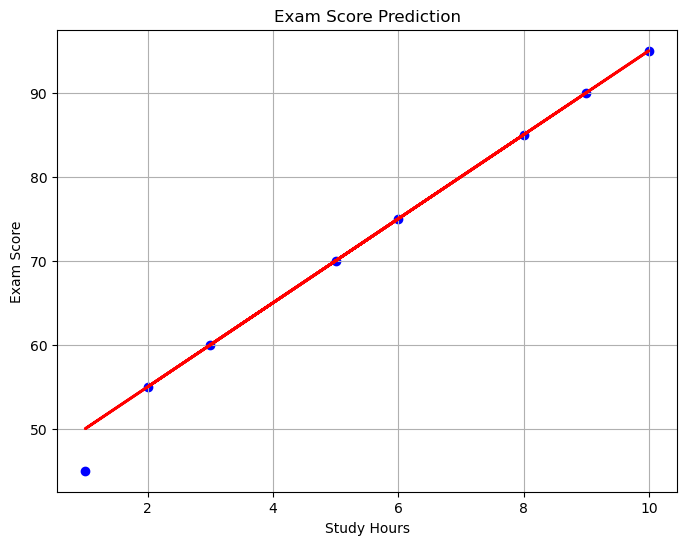

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model (optional, but useful for understanding performance)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Exam Score Prediction')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show();

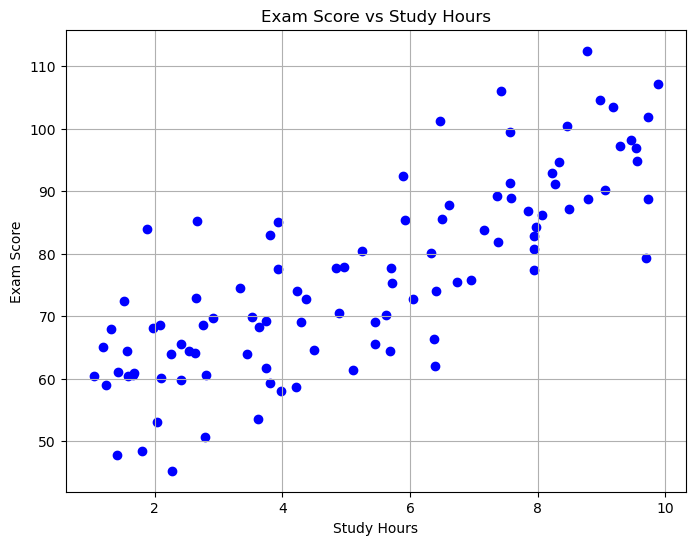

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate more realistic data with noise
np.random.seed(42)

# Simulate data for study hours and exam scores
study_hours = np.random.uniform(1, 10, 100)  # Generate 100 study hours between 1 and 10
exam_scores = 50 + study_hours * 5 + np.random.normal(0, 10, 100)  # Simulate exam scores with noise

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(study_hours, exam_scores, color='blue')
plt.title('Exam Score vs Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

In [5]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(study_hours.reshape(-1, 1), exam_scores, test_size=0.2, random_state=42)

# Print shapes for debugging
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (80, 1), y_train shape: (80,)
X_test shape: (20, 1), y_test shape: (20,)


Root Mean Squared Error (RMSE): 8.085168605026123


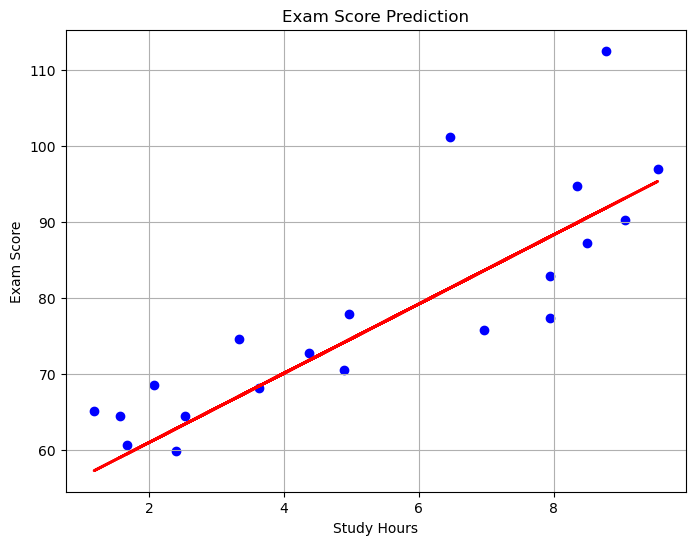

In [6]:

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model (optional, but useful for understanding performance)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Exam Score Prediction')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

In [7]:
new_study_hour = np.array([[5.5]])

predicted_score = model.predict(new_study_hour)
predicted_score

array([76.92236977])

In [8]:
df = pd.read_csv('./Data/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [9]:
df.shape


(184, 7)

In [10]:
# Extracting the 'Close' column for prediction
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on (80% of data)
training_data_len = int(np.ceil(len(dataset) * .8))

# Split the data into training and testing sets using train_test_split
X = []
y = []
for i in range(60, len(dataset)):
    X.append(dataset[i-60:i, 0])
    y.append(dataset[i, 0])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Print shapes for debugging
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')


X_train shape: (99, 60), y_train shape: (99,)
X_test shape: (25, 60), y_test shape: (25,)


In [11]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get the model's predictions
predictions = model.predict(X_test)

# Evaluate the model (optional, but useful for understanding performance)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 9.105530789926163


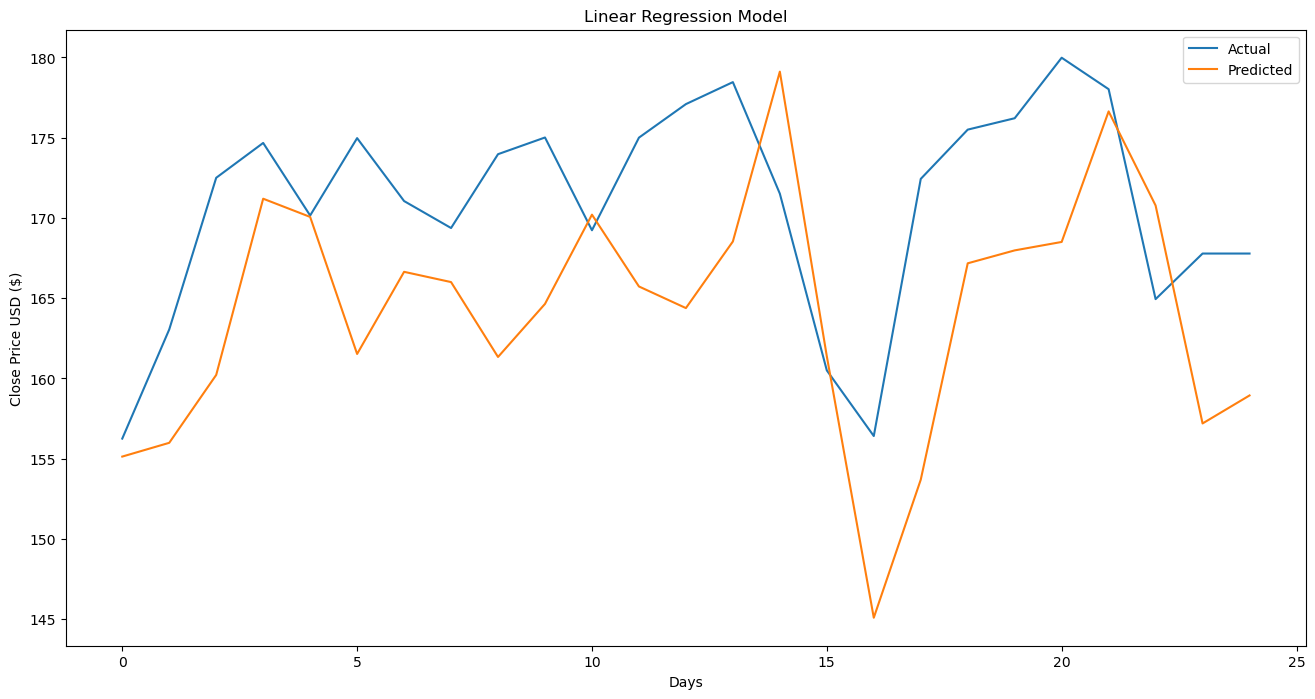

In [12]:
# Plot the data
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [13]:
# Predict the next day's closing price

last_60_days = data[-60:].values  # Last 60 days of closing prices
predicted_price = model.predict(last_60_days.reshape(1, -1))  # Predict next day's price

print(f'Predicted price for the next day: {predicted_price[0]}')

Predicted price for the next day: 163.4936723374509


# Multiple Linear regression

In [14]:
np.random.seed(42)
n_samples = 100
house_size = np.random.randint(1000,4000,n_samples)
bedrooms= np.random.randint(1,6,n_samples)
bathrooms= np.random.randint(1,4,n_samples)
house_age= np.random.randint(0,50,n_samples)
distance_to_city= np.random.randint(1,20,n_samples)

house_price= (house_size*200+bedrooms*5000+bathrooms*7000-house_age*1000-distance_to_city*2000+np.random.normal(0,10000,n_samples))
data={'House Size':house_size,'Number of Bedrooms':bedrooms,'Number of Bathrooms':bathrooms,'Age of the House':house_age,'Distance to City Center':distance_to_city,'House Price':house_price}
df = pd.DataFrame(data)
X = df[['House Size','Number of Bedrooms','Number of Bathrooms','Age of the House','Distance to City Center']]
y = df['House Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R-squared:",r2)
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Mean Squared Error: 91119496.56747133
R-squared: 0.9965744372726427
Intercept: -10593.98945441487
Coefficients: [  202.43186409  4719.83528624  9070.76270508 -1011.35948176
 -1734.67714872]


In [15]:
# Example single house features
single_house = {
    'House Size': 2500,
    'Number of Bedrooms': 3,
    'Number of Bathrooms': 2,
    'Age of the House': 10,
    'Distance to City Center': 5
}

# Convert the dictionary to a DataFrame
single_house_df = pd.DataFrame([single_house])

# Make a prediction for the single house
predicted_price = model.predict(single_house_df)

print("Predicted House Price for the single house:", predicted_price[0])


Predicted House Price for the single house: 508999.72149014875


In [16]:
# Example single house features
single_house = {
    'House Size': 3000,
    'Number of Bedrooms': 5,
    'Number of Bathrooms': 2,
    'Age of the House': 5,
    'Distance to City Center': 2
}

# Convert the dictionary to a DataFrame
single_house_df = pd.DataFrame([single_house])

# Make a prediction for the single house
predicted_price = model.predict(single_house_df)

print("Predicted House Price for the single house:", predicted_price[0])

Predicted House Price for the single house: 629916.1529649361


# Logistic Regression

In [17]:
# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_original = pd.read_csv('./Data/Invistico_Airline.csv')
df_original.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [19]:
df_original.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [20]:
df_original['satisfaction'].value_counts(dropna= False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [21]:
df_original.isnull().any()

satisfaction                         False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Seat comfort                         False
Departure/Arrival time convenient    False
Food and drink                       False
Gate location                        False
Inflight wifi service                False
Inflight entertainment               False
Online support                       False
Ease of Online booking               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Online boarding                      False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
dtype: bool

In [22]:
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [23]:
df_subset = df_original.dropna(axis= 0).reset_index(drop= True)


In [24]:
df_subset = df_subset.astype({'Inflight entertainment': float})

In [25]:
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()


In [26]:
df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [27]:

X = df_subset[["Inflight entertainment"]]
y = df_subset["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [28]:
clf = LogisticRegression().fit(X_train,y_train)

In [29]:
clf.coef_

array([[0.99752883]])

In [30]:
clf.intercept_

array([-3.19359054])

<Axes: xlabel='Inflight entertainment', ylabel='satisfaction'>

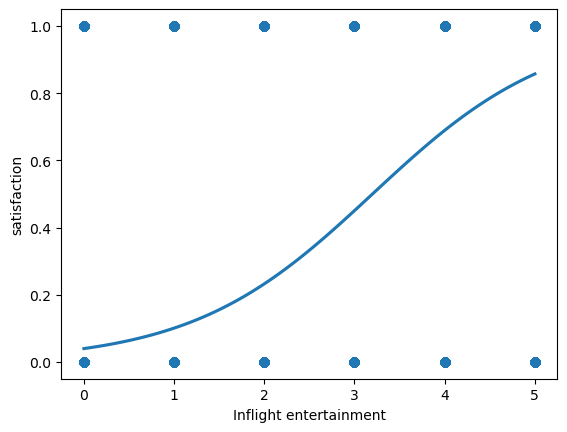

In [31]:
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df_subset, logistic=True, ci=None)

In [32]:
y_pred = clf.predict(X_test)

In [33]:
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


In [34]:
clf.predict_proba(X_test)

array([[0.14257646, 0.85742354],
       [0.55008251, 0.44991749],
       [0.89989529, 0.10010471],
       ...,
       [0.89989529, 0.10010471],
       [0.76826369, 0.23173631],
       [0.55008251, 0.44991749]])

In [35]:
clf.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

In [36]:

print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.801529
Precision: 0.816142
Recall: 0.821530
F1 Score: 0.818827


In [37]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

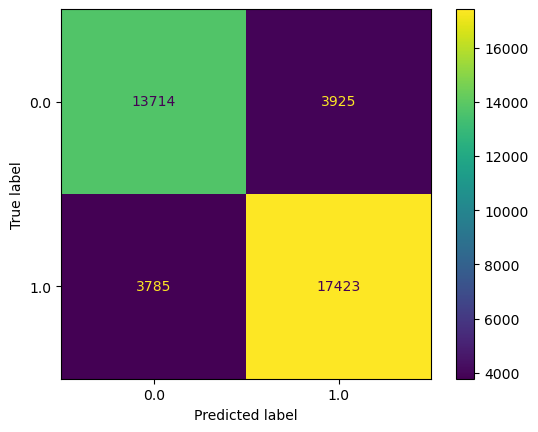

In [38]:
## cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

# Naive bayes classification

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [40]:
df = pd.read_csv('./Data/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [42]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [43]:
df.value_counts()

Category  Message                                                                                                                                                
ham       Sorry, I'll call later                                                                                                                                     30
          I cant pick the phone right now. Pls send a message                                                                                                        12
          Ok...                                                                                                                                                      10
          Okie                                                                                                                                                        4
          7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st "Ur Lovely Friendship"... good morning dear     

In [44]:
df.shape

(5572, 2)

In [45]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [46]:
df[df['Category'] == 'ham'].value_counts()

Category  Message                                                                                                                                 
ham       Sorry, I'll call later                                                                                                                      30
          I cant pick the phone right now. Pls send a message                                                                                         12
          Ok...                                                                                                                                       10
          Okie                                                                                                                                         4
          Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..     4
                                                                                        

In [47]:
df[df['Category'] == 'spam'].value_counts()

Category  Message                                                                                                                                                           
spam      Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!                   4
          #ERROR!                                                                                                                                                               3
          Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'    3
          Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.                                                            3
          December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for

In [48]:
label_encoder = LabelEncoder()

df['Spam'] = label_encoder.fit_transform(df['Category'])
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [49]:
df.drop('Category',inplace = True,axis = 1)

In [50]:
X = df.Message
y = df['Spam']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [52]:
clf = Pipeline([('vectorizer',CountVectorizer()),('nb',MultinomialNB())])

In [53]:
nb = clf.fit(X_train,y_train)

In [54]:
clf.score(X_train,y_train)

0.9932690150325331

In [55]:
clf.score(X_test,y_test)

0.9919282511210762

In [56]:
y_pred = clf.predict(X_test)

In [57]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

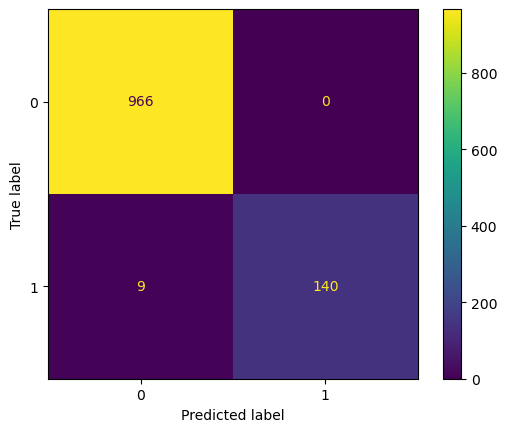

In [58]:
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()

In [59]:
testing_emails = ['hi, wanna hangout at 10? i heard there is a good chinese restaurant nearby. see you soon'
                 ,"don't miss this chance to win 100$ dollars"]


In [60]:
clf.predict(testing_emails)

array([0, 1])

# Decision Tree

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# This function displays the splits of the tree
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [62]:
from sklearn.datasets import load_iris

In [63]:
data = load_iris()


In [64]:
#convert to a dataframe

df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
#create the species column

df['Species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [67]:
#replace this with the actual names

target = np.unique(data.target)

target_names = np.unique(data.target_names)

targets = dict(zip(target, target_names))

df['Species'] = df['Species'].replace(targets)

In [68]:
x = df.drop(columns="Species")

y = df["Species"]

feature_names = x.columns

labels = y.unique()

#split the dataset

from sklearn.model_selection import train_test_split

X_train, test_x, y_train, test_lab = train_test_split(x,y,

                                                 test_size = 0.4,

                                                 random_state = 42)

In [69]:
clf = DecisionTreeClassifier(max_depth =5, random_state = 42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

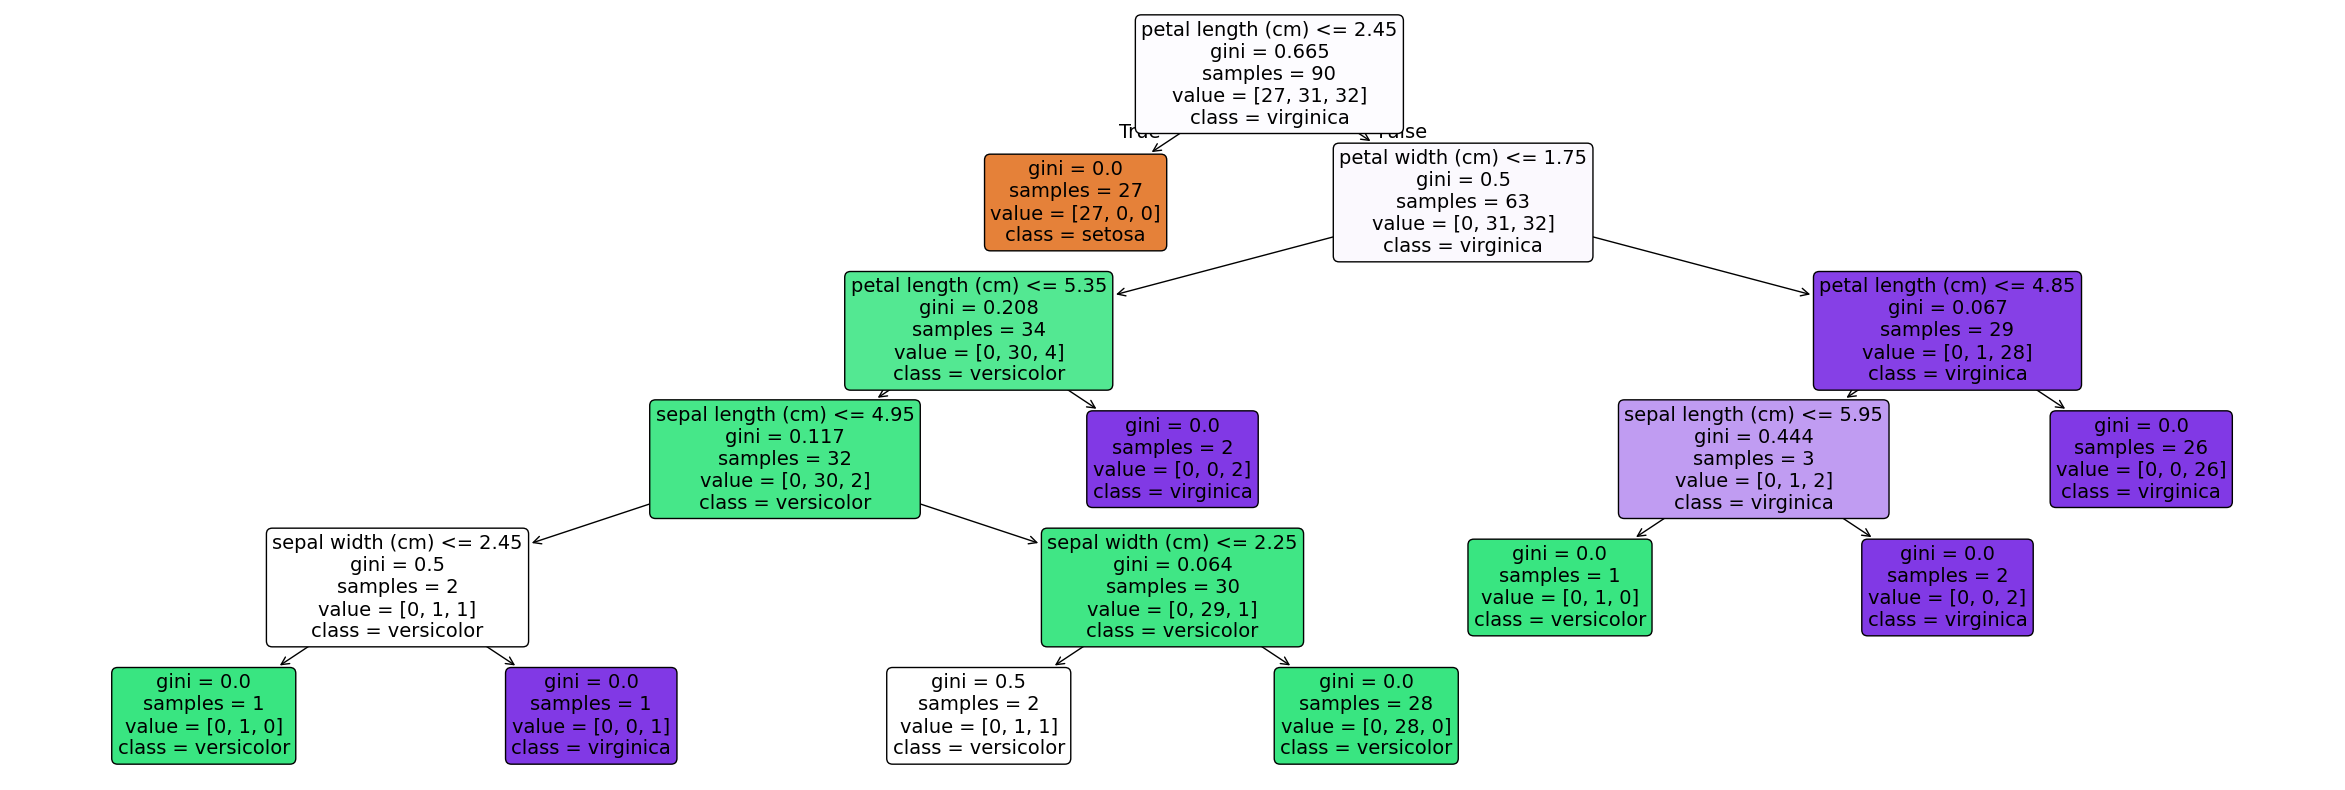

In [70]:
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), facecolor ='w')

a = tree.plot_tree(clf,feature_names = feature_names,class_names = labels,rounded = True,filled = True,fontsize=14)

plt.show()

# Random Forest

In [71]:
# importing required libraries
# importing Scikit-learn library and datasets package
from sklearn import datasets
 
# Loading the iris plants dataset (classification)
iris = datasets.load_iris()

In [72]:

print(iris.target_names)
print(iris.feature_names)


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [73]:
# dividing the datasets into two parts i.e. training datasets and test datasets
X, y = datasets.load_iris( return_X_y = True)
 
# Splitting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [74]:

# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
# creating dataframe of IRIS dataset
data = pd.DataFrame({'sepallength': iris.data[:, 0], 'sepalwidth': iris.data[:, 1],
                     'petallength': iris.data[:, 2], 'petalwidth': iris.data[:, 3],
                     'species': iris.target})

In [75]:
# printing the top 5 datasets in iris dataset
print(data.head())

   sepallength  sepalwidth  petallength  petalwidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


In [76]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL: 0.9555555555555556


In [77]:

# predicting which type of flower it is.
clf.predict([[3, 3, 2, 2]])

array([0])